# Anish Sajja Final Project 3D Modeling Molecules

Hello, My name is Anish Sajja and I really like coding and the sciences(Biology, Physics, Astronomy, Chemistry, and more) because I find them fascinating and they can give you an explanation for almost anything. In this project I have created a program that inputs a molecule of the users choice and returns a 3d model of that molecule. This program uses pymatgen, materials project, nglview, and ase in order to create a full interactive 3d model that can be moved by the user. This project was inspired by one of my previous projects last year where I made a program that modeled hydrocarbons in 2d using turtle. Now that I know how to use pymatgen I thought that it would be interesting to support the display of molecules within materials project.

I encountered many problems when I tried to create this program, but here are the main ones:

The first problem I ran into was trying to find a good modeling tool to create detailed models of the molecules. The first modeling tool that I found was rdkit which was a modeling module that works using smile formulas to create models. Because it used smile formulas which already show the structure I couldn't use it with pymatgen. Then I was able to find another modeling tool known as nglview which was able to show interactive 3d models of molecules and was able to use pymatgen structures.

The second problem that I encountered was with using the pymatgen structure to create a model. I wasn't able to directly use the structure data from  pymatgen to create a model so instead I looked for other ways to do it. This lead me to discovering and learning about cif files(which are files that hold the Crystallographic Information of a molecule) which allowed me to create the interactive 3d models in nglview.

This is a picture of me


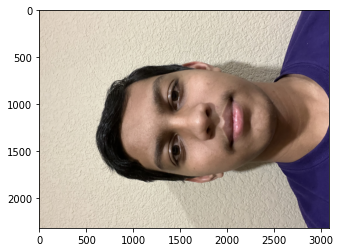

In [6]:
print("This is a picture of me")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Anish_Sajja_Image.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
from pymatgen.ext.matproj import MPRester 
from pymatgen.core import Lattice, Structure, Molecule
import ase #Atomic Simulation Environment
import nglview as nv # creates 3d models of molecules
from nglview import show_structure_file 
import pymatgen as mg
mpr = MPRester('z3rOZDNgb0SKTPlw')

In [8]:
#allows user to input what molecule they want to see a model of
inmolecule =input("Input a molecule of your choosing")

Input a molecule of your choosing H2O


In [9]:
#searches through Material project with the pretty formula/input and returns a list with dictionaries
#defining task_id(id of a certain model of a molecule) as a specific task_id and defining the pretty formula with it.
#It makes multiple dictionaries as there can be multiple models for a given formula/molecule
data = mpr.query(criteria={"pretty_formula": inmolecule}, properties=["task_id", "pretty_formula"])

In [10]:
data

[{'task_id': 'mp-558226', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-684704', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-697085', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-24043', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-1181087', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-558958', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-990441', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-684678', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-32959', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-673658', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-557082', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-634812', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-696735', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-703459', 'pretty_formula': 'H2O'},
 {'task_id': 'mp-697111', 'pretty_formula': 'H2O'}]

In [11]:
#shows the first task id in the list
data[0]['task_id']

'mp-558226'

In [12]:
#chooses the first task id from the list and defines the task id variable as it
#allowing us to make a model using this specific task id
task_id=data[0]['task_id']

In [13]:
#shows the task id we will use to make the model
task_id

'mp-558226'

In [14]:
structure = mpr.get_structures(task_id)
print(structure)

[Structure Summary
Lattice
    abc : 3.967512 8.121387 8.320159
 angles : 90.0 90.0 90.0
 volume : 268.0896704048384
      A : 3.967512 0.0 0.0
      B : 0.0 8.121387 0.0
      C : 0.0 0.0 8.320159
PeriodicSite: H (0.5883, 0.6183, 4.9661) [0.1483, 0.0761, 0.5969]
PeriodicSite: H (2.0388, 4.4448, 1.3013) [0.5139, 0.5473, 0.1564]
PeriodicSite: H (1.5310, 5.3666, 5.5170) [0.3859, 0.6608, 0.6631]
PeriodicSite: H (0.2619, 1.7828, 3.9740) [0.0660, 0.2195, 0.4776]
PeriodicSite: H (1.3395, 1.8205, 8.0351) [0.3376, 0.2242, 0.9657]
PeriodicSite: H (3.0646, 0.7177, 1.7984) [0.7724, 0.0884, 0.2161]
PeriodicSite: H (2.6280, 5.8812, 4.4451) [0.6624, 0.7242, 0.5343]
PeriodicSite: H (3.9124, 3.6766, 5.4614) [0.9861, 0.4527, 0.6564]
PeriodicSite: H (0.9029, 4.7784, 2.3617) [0.2276, 0.5884, 0.2839]
PeriodicSite: H (2.4365, 1.3059, 6.9632) [0.6141, 0.1608, 0.8369]
PeriodicSite: H (3.5147, 6.8155, 2.8032) [0.8859, 0.8392, 0.3369]
PeriodicSite: H (1.9287, 0.3841, 2.8588) [0.4861, 0.0473, 0.3436]
PeriodicSi

In [15]:
structure

[Structure Summary
 Lattice
     abc : 3.967512 8.121387 8.320159
  angles : 90.0 90.0 90.0
  volume : 268.0896704048384
       A : 3.967512 0.0 0.0
       B : 0.0 8.121387 0.0
       C : 0.0 0.0 8.320159
 PeriodicSite: H (0.5883, 0.6183, 4.9661) [0.1483, 0.0761, 0.5969]
 PeriodicSite: H (2.0388, 4.4448, 1.3013) [0.5139, 0.5473, 0.1564]
 PeriodicSite: H (1.5310, 5.3666, 5.5170) [0.3859, 0.6608, 0.6631]
 PeriodicSite: H (0.2619, 1.7828, 3.9740) [0.0660, 0.2195, 0.4776]
 PeriodicSite: H (1.3395, 1.8205, 8.0351) [0.3376, 0.2242, 0.9657]
 PeriodicSite: H (3.0646, 0.7177, 1.7984) [0.7724, 0.0884, 0.2161]
 PeriodicSite: H (2.6280, 5.8812, 4.4451) [0.6624, 0.7242, 0.5343]
 PeriodicSite: H (3.9124, 3.6766, 5.4614) [0.9861, 0.4527, 0.6564]
 PeriodicSite: H (0.9029, 4.7784, 2.3617) [0.2276, 0.5884, 0.2839]
 PeriodicSite: H (2.4365, 1.3059, 6.9632) [0.6141, 0.1608, 0.8369]
 PeriodicSite: H (3.5147, 6.8155, 2.8032) [0.8859, 0.8392, 0.3369]
 PeriodicSite: H (1.9287, 0.3841, 2.8588) [0.4861, 0.0473,

In [16]:
task_id

'mp-558226'

In [17]:
#constructs a cif file of the model with the given task_id
struct_cif2 = mpr.get_data(task_id, data_type='', prop="cif")

In [18]:
#displays the cif file
print(struct_cif2)

{'cif': "# generated using pymatgen\ndata_H2O\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   3.96751200\n_cell_length_b   8.12138700\n_cell_length_c   8.32015900\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   H2O\n_chemical_formula_sum   'H24 O12'\n_cell_volume   268.08967040\n_cell_formula_units_Z   12\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  H  H0  1  0.14828600  0.07613400  0.59687000  1\n  H  H1  1  0.51387900  0.54729400  0.15640500  1\n  H  H2  1  0.38588000  0.66079900  0.66308700  1\n  H  H3  1  0.06601300  0.21951400  0.47764000  1\n  H  H4  1  0.33760900  0.22416700  0.96573900  1\n  H  H5  1  0.77242400  0.08836800  0.21614400  1\n  H  H6

In [19]:
structure_cif2 = struct_cif2.get('cif')

In [20]:
print(structure_cif2)

# generated using pymatgen
data_H2O
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.96751200
_cell_length_b   8.12138700
_cell_length_c   8.32015900
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   H2O
_chemical_formula_sum   'H24 O12'
_cell_volume   268.08967040
_cell_formula_units_Z   12
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  H  H0  1  0.14828600  0.07613400  0.59687000  1
  H  H1  1  0.51387900  0.54729400  0.15640500  1
  H  H2  1  0.38588000  0.66079900  0.66308700  1
  H  H3  1  0.06601300  0.21951400  0.47764000  1
  H  H4  1  0.33760900  0.22416700  0.96573900  1
  H  H5  1  0.77242400  0.08836800  0.21614400  1
  H  H6  1  0.66239100  0.72416700  0.53426100  

In [21]:
with open("{}.cif".format(task_id), "w") as output:
    output.write(structure_cif2)

In [22]:
lattice = Lattice.cubic(1)
# sets the variable view to the model of the cif file
view = nv.show_structure_file("{}.cif".format(task_id))
#shows the model
view
#the model can be moved around by clicking and dragging


NGLWidget()

In [23]:
print("The model above is a model of "+inmolecule)

The model above is a model of H2O


In [24]:
print("This Task is done")
print("Thank you for running my program")

This Task is done
Thank you for running my program
